# <center>Artificial Neural Networks</center> 
<center>Author: Peter Torpey</center>

This notebook contains an introduction to Neural Networks along with a simple example of how to implement a Neural Network in Python. The purpose was to help self teach this concept and gain a deeper understanding of the topics discussed

Sources:
- https://realpython.com/python-ai-neural-network/
- https://www.mltut.com/implementation-of-artificial-neural-network-in-python/
- https://www.geeksforgeeks.org/implementing-ann-training-process-in-python/

Deep Learning is a technique in which you let the neural network figure out by itself which features are important instead of applying feature engineering techniques. 

### Neural Networks: Main Concepts

A neural network is a system that learns how to make predictions by the applying these steps:
1. Taking the input data
2. Making a prediction
3. Comparing the prediction to the desired outcome
4. Adjusting its internal state to predict correctly the next time 

### The Process to Train a Neural Network
Training a neural network is similar to the process of trial and error. Imagine you’re playing darts for the first time. In your first throw, you try to hit the central point of the dartboard. Usually, the first shot is just to get a sense of how the height and speed of your hand affect the result. If you see the dart is higher than the central point, then you adjust your hand to throw it a little lower, and so on.

With neural networks, the process is very similar: you start with some random weights and bias vectors, make a prediction, compare it to the desired output, and adjust the vectors to predict more accurately the next time. The process continues until the difference between the prediction and the correct targets is minimal.

Knowing when to stop the training and what accuracy target to set is an important aspect of training neural networks, mainly because of overfitting and underfitting scenarios.

### Example 1: ANN in Python using the Digits dataset

This dataset consists of images of handwritten digits along with their corresponding labels.

In [25]:
# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import layers, models

In [18]:
# Load and view the Digits dataset
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

#### Data Cleaning

Because the dataset contains unbalanced data, which can skew model performance, we'll want to scale the variables to create a more uniform distribution. This can be done using the MinMaxScaler() function in sklearn library.


In [19]:
# Scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(digits.data)
y = digits.target

#### Split the data into training and testing sets
This 

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Construct the neural network model

In [21]:
# Build the neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(64,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 output classes for digits 0-9

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

The code above creates a sequential model using the Keras API from TensorFlow. The model consists of three dense layers, with the input layer having 64 units (one for each pixel in the digit images), the hidden layer having 128 units, and the output layer having 10 units (corresponding to the 10 possible digit classes).

After building the model, we compile it with the Adam optimizer, specify the loss function as sparse categorical cross-entropy (since our labels are integers), and set the metric as accuracy.

In [22]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
45/45 [==============================] - 1s 2ms/step - loss: 1.9427 - accuracy: 0.4447
Epoch 2/10
45/45 [==============================] - 0s 2ms/step - loss: 0.9434 - accuracy: 0.8657
Epoch 3/10
45/45 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.9207
Epoch 4/10
45/45 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9450
Epoch 5/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1995 - accuracy: 0.9520
Epoch 6/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9645
Epoch 7/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1358 - accuracy: 0.9673
Epoch 8/10
45/45 [==============================] - 0s 2ms/step - loss: 0.1117 - accuracy: 0.9763
Epoch 9/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9784
Epoch 10/10
45/45 [==============================] - 0s 2ms/step - loss: 0.0856 - accuracy: 0.9854


We then train the model using the training data, specifying the number of epochs and batch size. Finally, we evaluate the trained model on the testing data and print the test loss and accuracy.

In [23]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

12/12 [==============================] - 0s 3ms/step - loss: 0.1153 - accuracy: 0.9722
Test loss: 0.1153
Test accuracy: 0.9722


In [26]:
# Predict labels for the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a classification report
cr = classification_report(y_test, y_pred)

12/12 [==============================] - 0s 751us/step


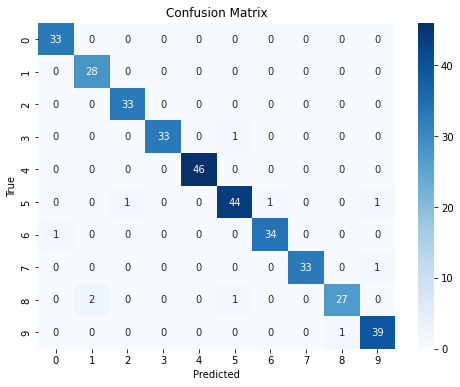

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.93      1.00      0.97        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.94      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.96      0.90      0.93        30
           9       0.95      0.97      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [27]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report
print("Classification Report:")
print(cr)

The classification report provides a detailed evaluation of the model's performance for each digit class. It includes metrics such as precision, recall, F1-score, and support.

Precision: It represents the accuracy of the positive predictions for a given class. In the context of the digits classification, precision measures the proportion of correctly predicted instances (true positives) out of all instances predicted as that specific digit. A higher precision indicates fewer false positives.

Recall: Also known as sensitivity or true positive rate, recall measures the proportion of correctly predicted instances (true positives) out of all actual instances of a particular class. In the case of digit classification, recall quantifies how well the model captures the true instances of each digit. A higher recall indicates fewer false negatives.

F1-score: The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance. It combines both precision and recall into a single metric. A higher F1-score indicates a better balance between precision and recall.

Support: Support represents the number of instances in each class in the test set. It provides an understanding of the distribution of the classes and helps interpret the significance of the precision, recall, and F1-score for each class.